In [1]:
import sys
import os
project_path = os.path.abspath('/Enter/Your/Project/Path/Here')
sys.path.append(project_path)
from src.API.mongo_utils import get_mongo_client, get_collection
from src.API.constant import AI, HUMAN, REUTER_COLLECTION, GEMINI_COLLECTION, GEMINI_IMPROVED_COLLECTION, OPEN_AI_COLLECTION, OPEN_AI_IMPROVED_COLLECTION
# IMPORTANT: 0 is AI, 1 is Human
# Initialize the client
client = get_mongo_client()
# Fetch collections
human_collection = get_collection(REUTER_COLLECTION)
 
Gemini_collection = get_collection(GEMINI_COLLECTION)
Gemini_improved_collection = get_collection(GEMINI_IMPROVED_COLLECTION)
openAI_collection = get_collection(OPEN_AI_COLLECTION)
openAI_improved_collection = get_collection(OPEN_AI_IMPROVED_COLLECTION)

# Fetch documents from the collections
gemini = Gemini_collection.find()
gemini_improved = Gemini_improved_collection.find()
openAI = openAI_collection.find()
openAI_improved = openAI_improved_collection.find()
print("Making the list of Document")
gemini_documents = [doc for cursor in [gemini] for doc in cursor]
openAI_documents = [doc for cursor in [openAI] for doc in cursor]
gemini_improved_documents = [doc for cursor in [gemini_improved] for doc in cursor]
openAI_improved_documents = [doc for cursor in [openAI_improved] for doc in cursor]
human_documents = human_collection.find()

Successfully created MongoDB client.
Making the list of Document


In [2]:
# transform the document into a list of text with the Content field
gemini_text = [doc['Content'] for doc in gemini_documents]
openAI_text = [doc['Content'] for doc in openAI_documents]
gemini_improved_text = [doc['Content'] for doc in gemini_improved_documents]
openAI_improved_text = [doc['Content'] for doc in openAI_improved_documents]
human_text = [doc['Content'] for doc in human_documents]
# Print the length of the list
print("Gemini: ", len(gemini_text))
print("OpenAI: ", len(openAI_text))
print("Gemini Improved: ", len(gemini_improved_text))
print("OpenAI Improved: ", len(openAI_improved_text))
print("Human: ", len(human_text))

Gemini:  5000
OpenAI:  10000
Gemini Improved:  5000
OpenAI Improved:  10000
Human:  5000


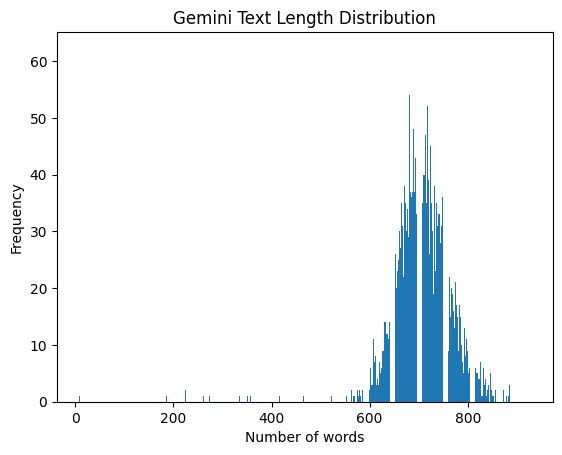

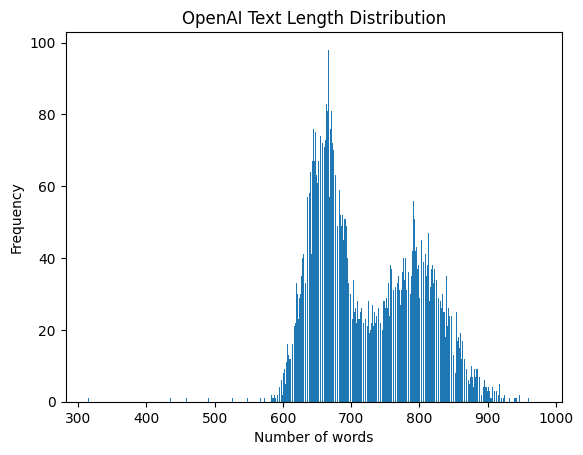

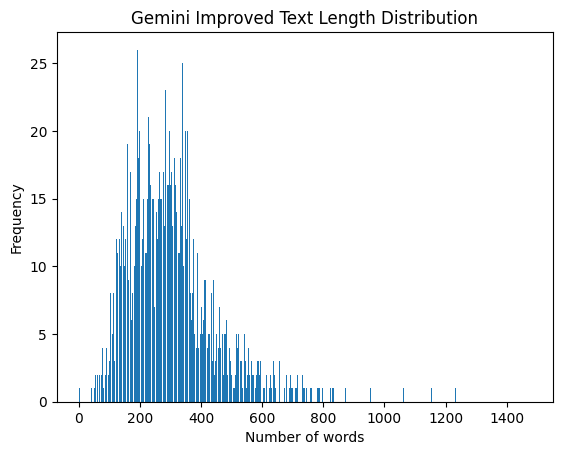

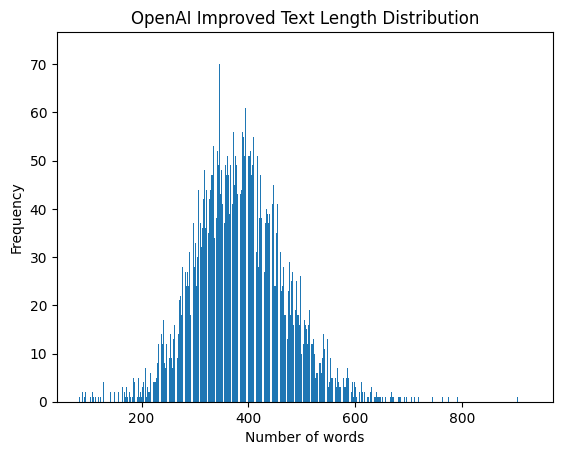

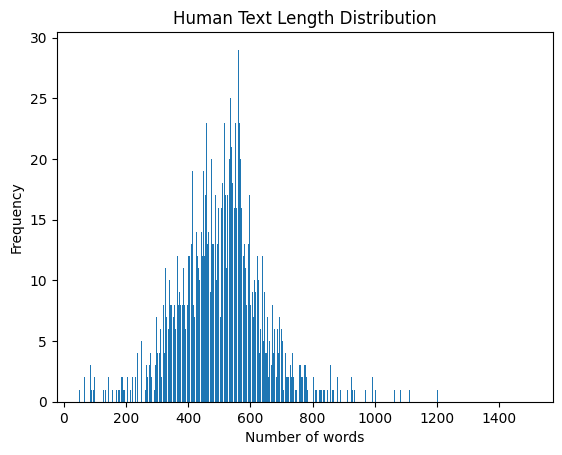

Gemini: 
Average: 706.80, Median: 707.00, Standard Deviation: 64.44
OpenAI: 
Average: 724.33, Median: 703.00, Standard Deviation: 76.83
Gemini Improved: 
Average: 299.77, Median: 276.50, Standard Deviation: 150.01
OpenAI Improved: 
Average: 384.52, Median: 379.00, Standard Deviation: 87.04
Human: 
Average: 505.66, Median: 510.00, Standard Deviation: 135.47


In [5]:
# Calculate the average, median, and sd of length of the text in each list
import statistics
import matplotlib.pyplot as plt
from collections import Counter

def calculate_stats(text_list, chart_title='Distribution of Text Lengths'):
    # Find the number of words in each text
    lengths = [len(text.split()) for text in text_list]
    avg = statistics.mean(lengths)
    median = statistics.median(lengths)
    sd = statistics.stdev(lengths)
    # Plot bar chart of word length distribution
    length_counts = Counter(lengths)
    plt.bar(length_counts.keys(), length_counts.values())
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')
    plt.title(chart_title)
    plt.show()
    return avg, median, sd
def fancy_print_stats(stats):
    avg, median, sd = stats
    print(f"Average: {avg:.2f}, Median: {median:.2f}, Standard Deviation: {sd:.2f}")
# Calculate the stats for each list
gemini_stats = calculate_stats(gemini_text, 'Gemini Text Length Distribution')
openAI_stats = calculate_stats(openAI_text, 'OpenAI Text Length Distribution')
gemini_improved_stats = calculate_stats(gemini_improved_text, 'Gemini Improved Text Length Distribution')
openAI_improved_stats = calculate_stats(openAI_improved_text, 'OpenAI Improved Text Length Distribution')
human_stats = calculate_stats(human_text, 'Human Text Length Distribution')
# Print the stats for each list
print("Gemini: ")
fancy_print_stats(gemini_stats)
print("OpenAI: ")
fancy_print_stats(openAI_stats)
print("Gemini Improved: ")
fancy_print_stats(gemini_improved_stats)
print("OpenAI Improved: ")
fancy_print_stats(openAI_improved_stats)
print("Human: ")
fancy_print_stats(human_stats)